In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# https://mitu.co.in/dataset
# dataset => Salary_Data.csv

#### import the dataset

In [7]:
df = pd.read_csv('Salary_Data.csv')

In [8]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Visualize

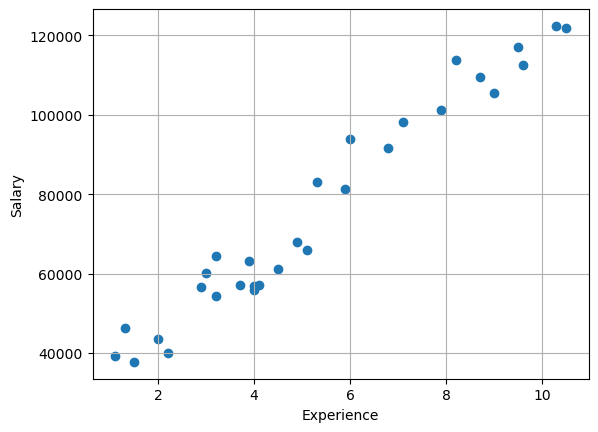

In [9]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(df['YearsExperience'],df['Salary']);

#### separate input data and output data

In [10]:
x = df['YearsExperience'].values    # input
y = df['Salary']             # output

In [11]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [12]:
x = x.reshape(30,1)

In [13]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [14]:
x.shape

(30, 1)

#### cross validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size = 0.25)

In [17]:
x_train.shape

(22, 1)

In [18]:
x_test.shape

(8, 1)

#### Build the regression Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(x_train, y_train)

LinearRegression()

#### Predict on unseen/ testing data

In [23]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ]])

In [24]:
y_pred = regressor.predict(x_test)

In [25]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


#### Evaluation: Mean Absolute error

In [33]:
np.mean(abs(y_test-y_pred))

3508.5455930660555

In [35]:
# Accuracy / r2 score/ linearity score
regressor.score(x,y) * 100

95.5975487542377

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred) * 100

5.7545126467796965

In [37]:
#### Line of best fit

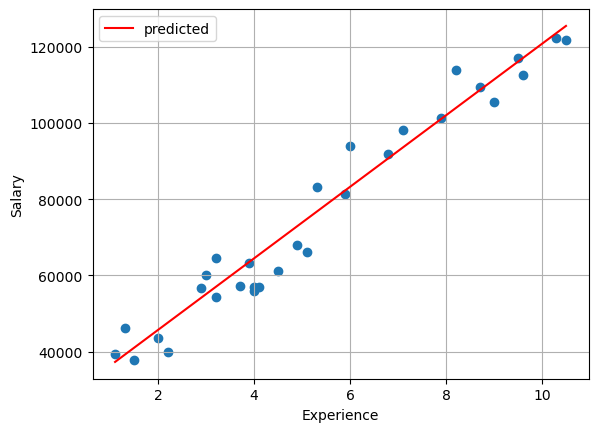

In [40]:
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(x, regressor.predict(x), color= 'red', label = 'predicted')
plt.legend()

In [41]:
regressor.predict([[15]])

array([167682.34869593])

In [42]:
regressor.predict([[20]])

array([214580.90115566])

In [44]:
# y = mx + c
# x = input, c = y_intercept
# slope = m
regressor.coef_

array([9379.71049195])

In [45]:
regressor.intercept_   # c

26986.691316737248

In [46]:
# check for 20 yrs

9379.71049195 * 20 + 26986.691316737248

214580.90115573723